In [1]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/nghiatnh/Study/Sem5/AIL302m/Projects/AIL302m-Machine_Learning/')
from Modules.classification.multi_layer_perceptron import MultilayerPerceptron

In [2]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j


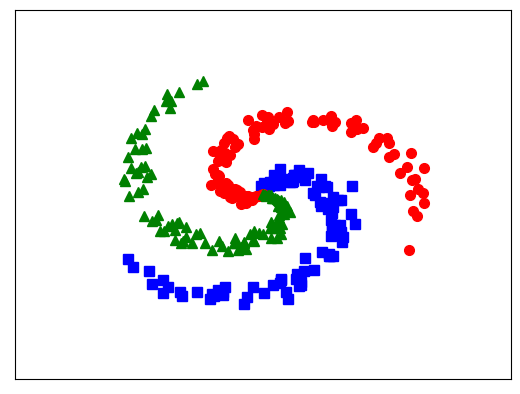

In [3]:
# lets visualize the data:

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()


In [4]:
from sklearn.model_selection import train_test_split
x_t, x_test, y_t, y_test = train_test_split(X.T, y.T, shuffle=True, test_size=0.2)
print(x_t.shape)
print(y_t.shape)

(240, 2)
(240,)


In [5]:
clf = MultilayerPerceptron(max_iter=100000, tol=1e-4, batch_size=50, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=0.001, show_loss=True, alpha=0.0001, activation='relu')
clf.fit(x_t, y_t)

epoch 999:	|██████████████████████████████████████████████████|	100%
epoch 1000, train loss: 0.663423, validation loss: 0.680054, validation accuracy: 0.500000
epoch 1999:	|██████████████████████████████████████████████████|	100%
epoch 2000, train loss: 0.548362, validation loss: 0.573616, validation accuracy: 0.666667
epoch 2999:	|██████████████████████████████████████████████████|	100%
epoch 3000, train loss: 0.357403, validation loss: 0.361859, validation accuracy: 0.791667
epoch 3999:	|██████████████████████████████████████████████████|	100%
epoch 4000, train loss: 0.257851, validation loss: 0.260738, validation accuracy: 0.875000
epoch 4999:	|██████████████████████████████████████████████████|	100%
epoch 5000, train loss: 0.199992, validation loss: 0.210452, validation accuracy: 0.916667
epoch 5999:	|██████████████████████████████████████████████████|	100%
epoch 6000, train loss: 0.159407, validation loss: 0.172919, validation accuracy: 0.916667
epoch 6999:	|██████████████████████

In [6]:
print("train accuracy: {}%".format(clf.score(x_t, y_t) * 100))
print("test accuracy: {}%".format(clf.score(x_test, y_test) * 100))

train accuracy: 98.75%
test accuracy: 96.66666666666667%


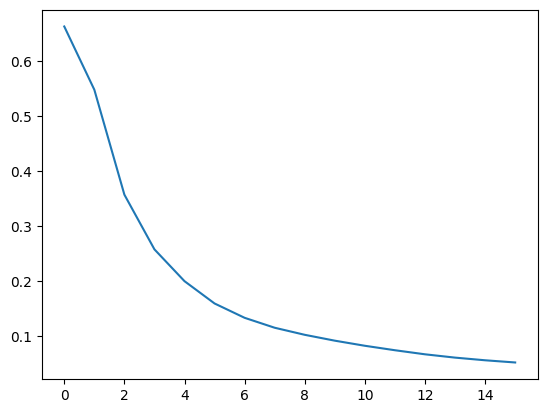

In [7]:
plt.plot(clf.loss_curve_)